<a href="https://colab.research.google.com/github/ipeirotis/dealing_with_data/blob/master/05-Time_Series/A-Introduction_to_Time_Series_using_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Time Series and Forecasting

*Based on the book [Introduction to Time Series and Forecasting](https://link.springer.com/book/10.1007/978-3-319-29854-2) by Brockwell and Davis.*



## What is a Time Series?

A time series is a set of observations $x_t$, each one being recorded at a specific time $t$. In our sessions, we focus on **_discrete_** time series, where observations are recorded at fixed time intervals (e.g., once an hour, or every 30 seconds, or every 7 days). 

We only consider **_regular_** time series, where we the time between observations is constant (i.e., we do not consider account deposits or withdrawals from an ATM that happen at various times; these are examples of an irregular time series).

## Examples of Time Series



In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# This is just to select the style of the generated plots. Feel free to experiment
# and select other styles that you may like better. Notice that Style sheets are 
# designed to be composed together. So you can have a style sheet that customizes 
# colors and a separate style sheet that alters element sizes for presentations. 
# print(plt.style.available)
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

### Australian red wine "sales", (thousands of litres) monthly, Jan 80 - Oct 91

The file [`australian-wine-sales.txt`](https://storage.googleapis.com/datasets_nyu/australian-wine-sales.txt) contains the monthly sales of Australian red wines in for the period Jan-1980 to Oct-1991. Let's take a peak at the data file: We will use Pandas and the `pd.read_csv` function to read the text file into a dataframe. 

In [40]:
url = "https://storage.googleapis.com/datasets_nyu/australian-wine-sales.txt"
df = pd.read_csv(url, sep='\t')

##### What is this code?
# The `read_csv` command can read directly from a URL, so we pass directly 
# the URL of the dataset as a parameter. Also, since the file uses the 
# tab character to separate the columns, we pass the `sep='\t'` option to 
# the `read_csv` command, indicating that the separator is the "tab"
# (i.e. `\t` ) character.


In [41]:
df.head(10)

,Date,Sales
0,Jan-80,464
1,Feb-80,675
2,Mar-80,703
3,Apr-80,887
4,May-80,1139
5,Jun-80,1077
6,Jul-80,1318
7,Aug-80,1260
8,Sep-80,1120
9,Oct-80,963


We can try to plot the time series:

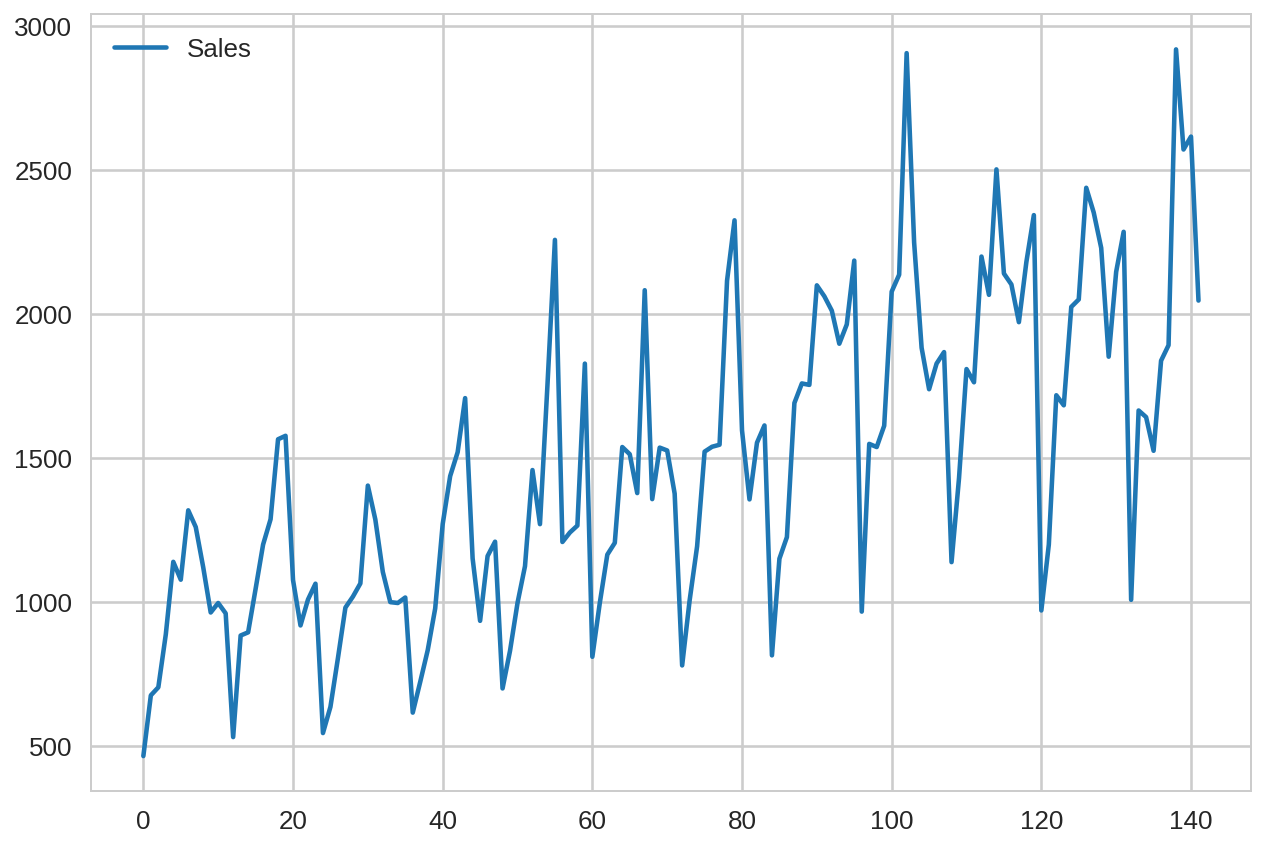

In [42]:
df.plot()

The plot would look better if we had the x-axis to be a date, instead of a number. By default, Pandas uses the "index" of the dataframe as the x-axis.



Let's check the data types that Pandas inferred:

In [43]:
df.dtypes

Date     object
Sales     int64
dtype: object

In this case pandas figured out that `Sales` is a number, but not that `Date` is a date. The following two commands convert the two columns into a date and a numeric data type, respectively. (Technically, we could skip the conversion for `Sales` but I want to show how we convert data types.)

We will set  the `Date` column to be the index of the dataframe, so that we can plot the sales with dates as the x-axis.

In [44]:
df["Date"] = pd.to_datetime(df["Date"])
df["Sales"] = pd.to_numeric(df["Sales"])

In [47]:
df = df.set_index("Date")
df

,Sales
Date,
1980-01-01,464
1980-02-01,675
1980-03-01,703
1980-04-01,887
1980-05-01,1139
...,...
1991-06-01,1892
1991-07-01,2920
1991-08-01,2572


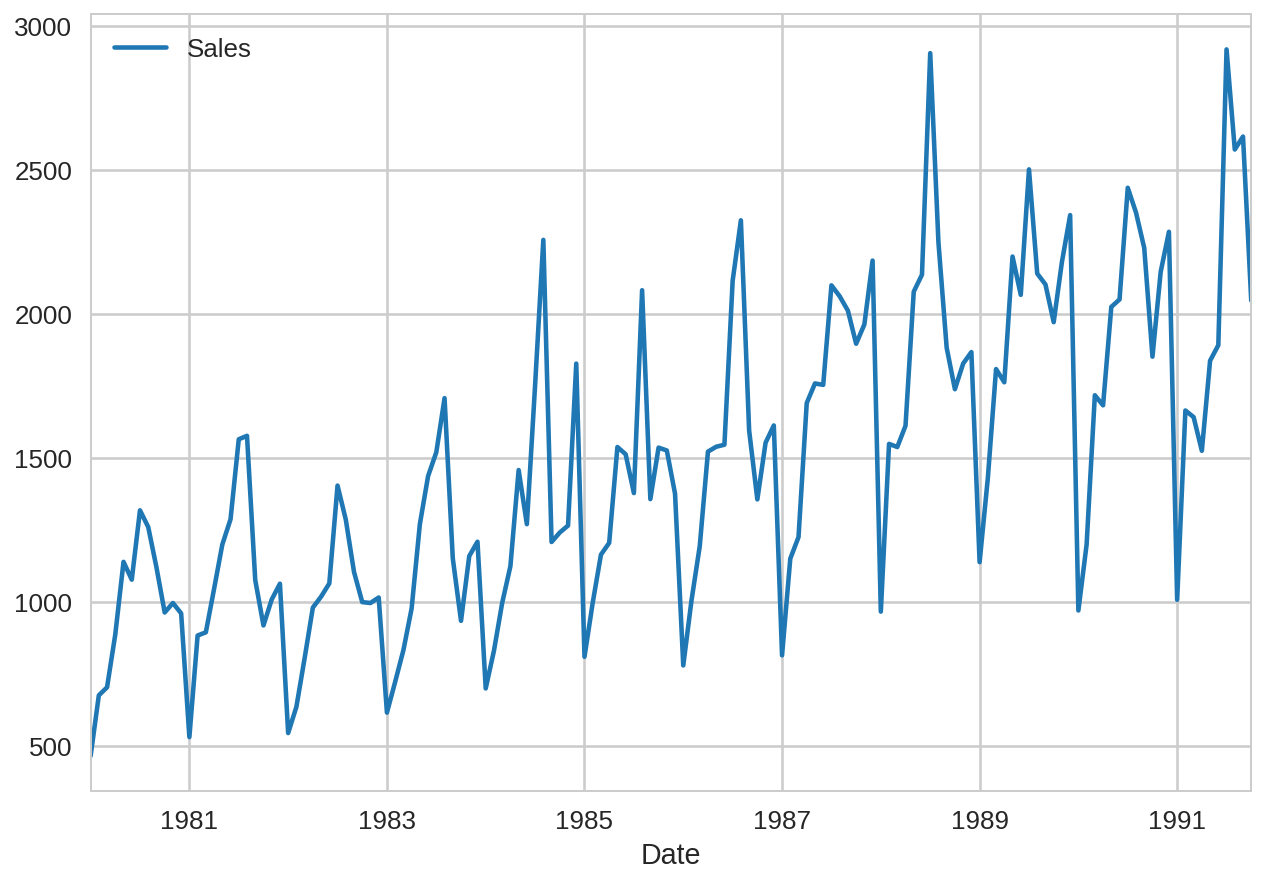

In [49]:
df.plot()

It appears from the graph that the sales have an upward trend and a seasonal pattern with a peak in July and a trough in January.

In [58]:
df["Sales"].autocorr(lag=1)
df["Sales"].autocorr(lag=2)
df["Sales"].autocorr(lag=3)

0.5104183331557987

#### Jumping Ahead: Lag plots, autocorrelation plots, and decompositions.

Pandas provides two types of plots that can be used for the analysis of time series: the `lag_plot` and the `autocorrelation_plot`. We can also use the seasonal decomposition functionality of `statsmodels` to separate the time series into a trend, seasonal component, and residual noise. We will go quickly over these for now, mainly for demo purposes. Proper treatment of these topics require deeper analysis.



##### Lag plot

The lag plot shows the value of the series at time $t$ vs. its value at time $t+1$. If there is no dependency (i.e., the time series is noise) then the lag plot is a scatterplot without any sign of correlation. If we can see a pattern and a correlation, then the series exhibits autocorrelation. For example, below we can see that there is a rather strong correlation of the two variables, indicating that the sales in time $t+1$ is similar to the sales at time $t$.

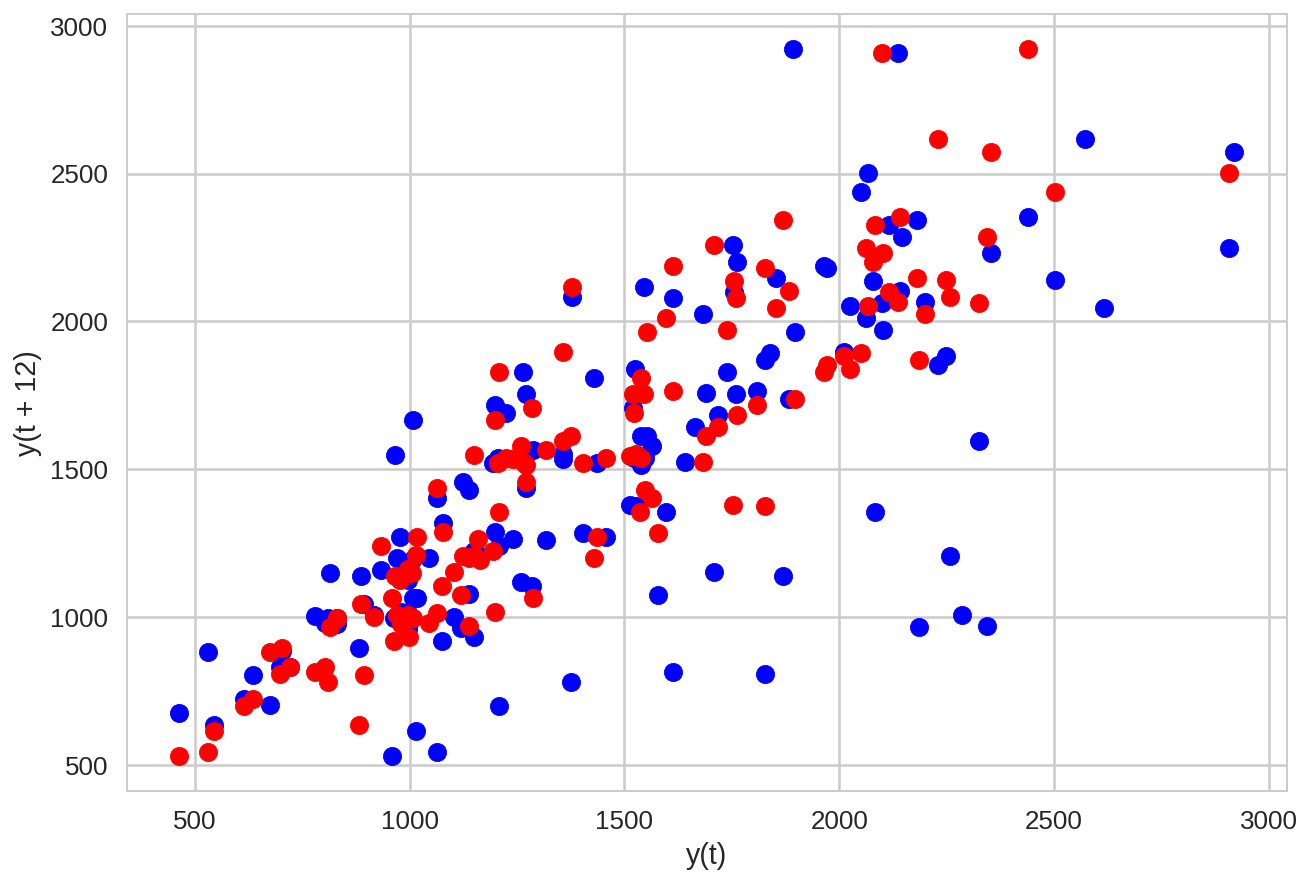

In [61]:
from pandas.plotting import lag_plot
lag_plot(df["Sales"], lag = 1, c='b')
lag_plot(df["Sales"], lag = 12, c='r')

##### Autocorrelation Plot

In a more general setting, we want to also see if the value of the series at time $t$ is predictive of the value at time $t+n$. Such dependency would indicate that there is *autocorrelation* in the series. The autocorrelation plot shows the correlation value for various values of $n$.

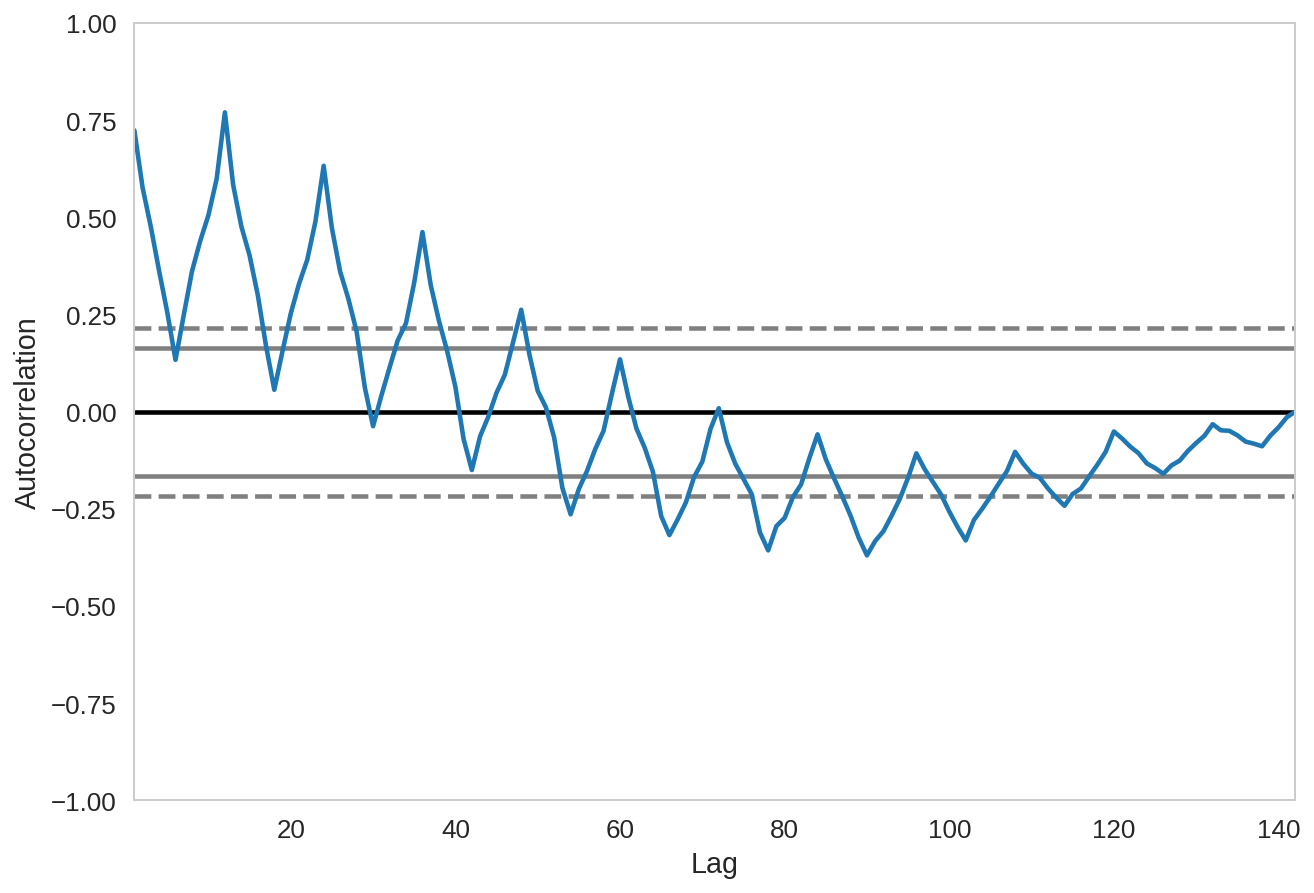

In [62]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df["Sales"])

##### Trend/Seasonal Decomposition



<Figure size 748.8x514.8 with 0 Axes>

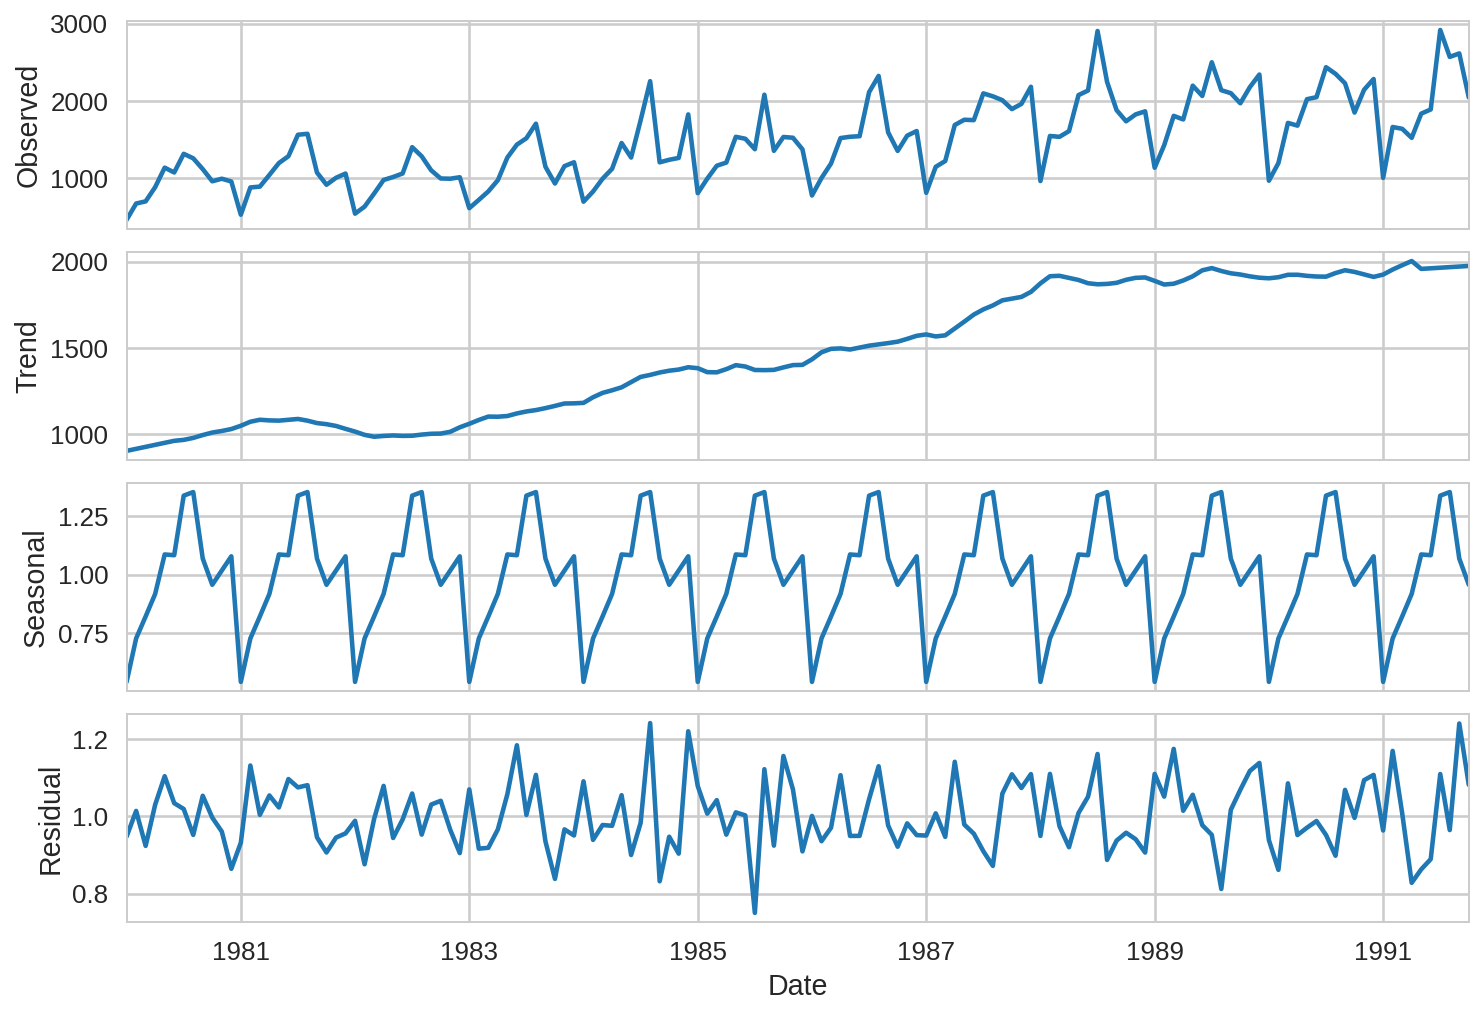

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

# We decompose assumming a 12-month periodicity. 
# We can also specify a multiplicative instead of an additive model
# The additive model is Y[t] = T[t] + S[t] + e[t]
# The multiplicative model is Y[t] = T[t] * S[t] * e[t]
decomposition = seasonal_decompose(df['Sales'], model='multiplicative', freq=12, extrapolate_trend='freq')  
fig = plt.figure()
fig = decomposition.plot()

#### Accessing indinvidual components of the decomposition

Once we have the decomposed time series model, we can also access the different components.

For example, we can get the trend of the time series, after removing the seasonality component:

In [70]:
# The outcome is a pandas Series, which is effectively the same as a single column of dataframe
decomposition.trend

Date
1980-01-01     902.453574
1980-02-01     914.104652
1980-03-01     925.755730
1980-04-01     937.406808
1980-05-01     949.057887
                 ...     
1991-06-01    1962.804099
1991-07-01    1966.218143
1991-08-01    1969.632187
1991-09-01    1973.046232
1991-10-01    1976.460276
Name: Sales, Length: 142, dtype: float64

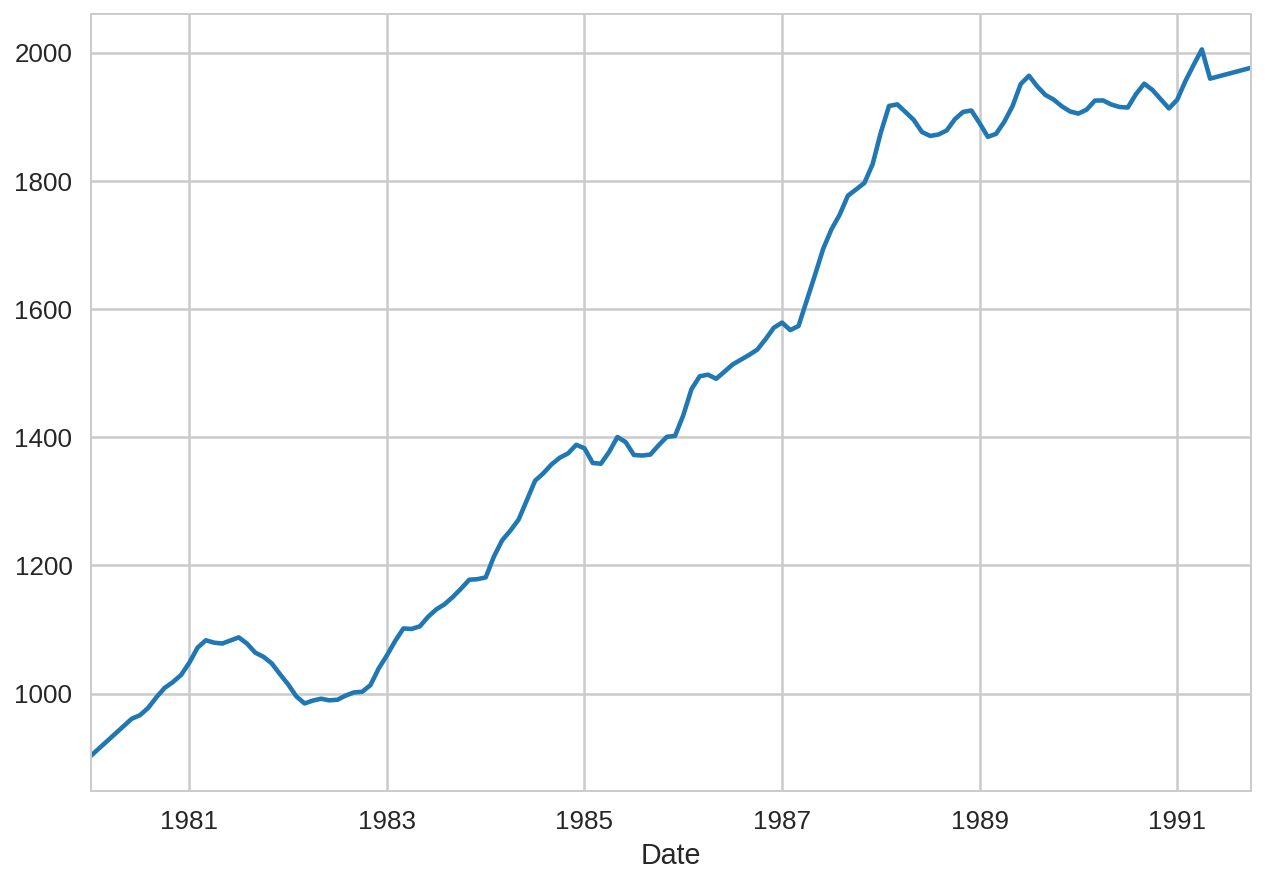

In [71]:
decomposition.trend.plot()

### The monthly accidental deaths data, 1973–1978

In [ ]:
!cat /data/acc-deaths.txt

This is a different type format that the file that we had before. First of all, we have _fixed width_ columns, and not a tab-separated file. So instead of using the `read_csv` command, we will use the `read_fwf` command to read the data.

In [ ]:
df = pd.read_fwf("/data/acc-deaths.txt")
df.set_index('Year')

##### Melt and Pivot_Table

Now we want to take the month-columns, and convert the file into a file with the format `<date>`, `<value>`.

The command for this is the [melt](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) command. (For the opposite operation, use the [pivot_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) function.)

In [ ]:
df = pd.melt(df, id_vars=['Year'], 
        value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        var_name='Month', value_name='Deaths')
df.head(10)

In [ ]:
df.pivot_table(
    index='Year',
    columns='Month',
    values = 'Deaths'

)

Now, we want to merge the month and year columns, to create a Date column.

In [ ]:
# Notice the use of .astype(str) function that converts the int64 datatype into a string.
# Without that function, we get an error message that we cannot add an integer (Year) with a string (Month)
df["Date"] = df["Month"] + "-" + df["Year"].astype(str)
df

In [ ]:
df.dtypes

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format='%b-%Y')
df

Now, that we have the Date column, we can delete the month and year columns. Notice the `axis='columns'` part: this means that we drop a _column_ with that name. If we used `axis='rows'`, then Pandas would have been looking for a _row_ with that key to drop.

In [ ]:
df.drop("Month", axis='columns', inplace=True)
df.drop("Year", axis='columns', inplace=True)

And now we convert the `Date` to be an index, so that it can be used as the x-axis for plotting the series.

In [ ]:
df.set_index(keys="Date", inplace=True)

In [ ]:
df.head(5)

Notice that the dates are not in order (we get the January's for all the years first, then the February's etc). While this is not an issue with plotting, this can be an issue for other types of analyses. For this reason, we sort the index:

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.head(5)

In [ ]:
df.plot()

Like the red wine sales, the monthly accidental death ﬁgures show a strong seasonal pattern, with the maximum for each year occurring in July and the minimum for each year occurring in February. The presence of a trend  is much less apparent than in the wine sales. Later in this module, we will how we often represent the data as the sum of a trend, a seasonal component, and a residual term.

#### Exercise

* Perform a decomposition of the time series into a trend, seasonal, and residual component.
* Try out both the additive and the multiplicative approach for the decomposition. Try to interpret and understand the difference in the reported seasonal component.
* Extract the trend for the accidental deaths.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# We decompose assumming a 12-month periodicity. 
# There is a weekly component as well, which we ignore.
# We can also specify a multiplicative instead of an additive model
# The additive model is Y[t] = T[t] + S[t] + e[t]
# The multiplicative model is Y[t] = T[t] * S[t] * e[t]
decomposition = seasonal_decompose(df['Deaths'], model='multiplicative', freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  

In [ ]:
# Extracting the deaths trend component
decomposition.trend.plot()

#### Advanced: Time Series Window operations: Rolling / Expanding / EW

One question that comes up when we have a periodic time series is: "How can I figure out the overall trend?". In the examples above, we relied on a "black box" where we simply asked for the time series to be decomposed into a trend, seasonal, and residual component. Now, let's dig a bit deeper on how we can extract trend components that are unaffected by seasonality.

For that, we often rely on "window" functions, that operate over a set of continuous time series points. For example, if we have a time series that has a 12-month seasonality, we can take the 12-month average, which will not exhibit seasonality, but will capture the trend. 

These windows functions are common time series operations. Pandas provides support for various types of windows. Here are a few that are commonly used: 
* [Rolling window](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html): We compute the function over a time period equal to a window
* [Expanding](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.expanding.html): We compute the function over a period of 1, 2, 3,... instances.
* [Exponential weighting](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html): We keep a window of a fixed size but we weight less and less (exponentially) the old data points.

In [ ]:
# Notice that we use the idiom df.Deaths instead of df['Deaths']. 
# The two are equivalent

# Use different linestyle, and use high alpha to make the series less visually prominent
df.Deaths.plot(label='Raw', linestyle ="--", alpha=0.25)

# Plot the 12-month moving average
df.Deaths.rolling(12).mean().plot(label='12M MA', alpha=0.75)

# Plot the expanding mean. This is the mean of the series from the beginning till that point in time
df.Deaths.expanding().mean().plot(label='Expanding', alpha=0.75)

# Plot the exponentially weighted moving average. This moving average weighs more heavily the newer
# data points and weighs less the old ones. 
df.Deaths.ewm(halflife=12).mean().plot(label='EWMA (halflife 12M)', alpha=0.75)

# places the legend to the right side (1) and middle of the y-axis (0.5)
plt.legend(bbox_to_anchor=(1, .5)) 
plt.tight_layout()

### US Strikes (1968-1976) and economic output

The data is the same data as originally used in J. Kennan, "The Duration of Contract strikes in U.S. Manufacturing", 
Journal of Econometrics, 1985, Vol. 28, pp.5-28. The data is monthly U.S. data from 1968(1) to 1976(12).

* STRIKES is number of strikes (number of contract strikes in U.S. manufacturing beginning each month) 
* OUTPUT is level of economic activity (measured as cyclical departure of aggregate production from its trend level) 


In [ ]:
!head -20 /data/strikes.tsv

In [ ]:
df = pd.read_csv("/data/strikes.tsv", sep='\t')
df.head(5)

In [ ]:
df.dtypes

In [ ]:
df["DATE"] = pd.to_datetime(df["DATE"], format='%b-%y')

In [ ]:
df.head(15)

Oops, we have a problem. According to https://docs.python.org/2/library/time.html when we have a 2-digit year, "_values 69-99 are mapped to 1969-1999, and values 0–68 are mapped to 2000–2068_". 

We now need to write a function that will edit the year-parsing problem.

In [ ]:
from pandas.tseries.offsets import DateOffset

def fix_year(dt):
    if dt.year > 2050:
        return dt - DateOffset(years=100)
    else:
        return dt

And then apply the function to the dataframe column using the `apply` command.

In [ ]:
df["DATE"] = df["DATE"].apply(fix_year)
df.head(15)

_Note: We can also fix that issue by replacing the 2-digit year with a 4-digit value, and then proceed as usual. We can do that using "**regular expressions**", which we will discuss later on. For reference, here is the command, which will look super cryptic right now, but will be easy to understand later on._

```python 
df.DATE = df.DATE.astype(str).replace(to_replace = '(\w{3})-(\d{2})', value=r'\1-19\2', regex=True )
```


In [ ]:
df.set_index(keys="DATE", inplace=True)
df.sort_index(inplace=True)

In [ ]:
df.STRIKES.plot()

In [ ]:
df.OUTPUT.plot()

#### Exercise

* Perform a decomposition of the time series above (strikes and output)
* Is there a significant seasonality component?



### US Population Recorded by the US Census

In [ ]:
!head -5 /data/us-population2.txt

In [ ]:
# We use the thousands=',' option to properly convert the population numbers to integers
df = pd.read_csv("/data/us-population2.txt", sep=' ', thousands=',')
df["Year"] = pd.to_numeric(df["Year"])
df["US_Population"] = pd.to_numeric(df["US_Population"])
df.set_index(keys="Year", inplace=True)

df.plot()

#### Level of Lake Huron 1875--1972 

Annual measurements of the level, in feet, of Lake Huron 1875--1972

In [ ]:
!head -5 /data/lake-huron.txt

In [ ]:
df = pd.read_csv("/data/lake-huron.txt", sep='\t')
df.set_index(keys="Year", inplace=True)
df.plot()